In [3]:
import pandas as pd
import nltk
from nltk.stem.wordnet import WordNetLemmatizer
import gensim

nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [1]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
location = "/content/drive/Shared drives/CMPE 257: Machine Learning/AlterusVera-Datasets/liar_dataset/"
location1= "/content/drive/Shared drives/CMPE 257: Machine Learning/AlterusVera-Datasets/"
location_fake_nonfake_processed = "/content/drive/Shared drives/CMPE 257: Machine Learning/AlterusVera-Datasets/fake-news-kaggle/"

# Data Loading

In [5]:
# Load Dataset from drive
fake_news_data = pd.read_csv('/content/drive/My Drive/MLSpring2020/TheMeanSquares-StockPrediction/Alternus-Vera TheMeanSquares/Iteration 1/Datasets/fake.csv', low_memory =False)
fake_news_data.head(2)

,uuid,ord_in_thread,author,published,title,text,language,crawled,site_url,country,domain_rank,thread_title,spam_score,main_img_url,replies_count,participants_count,likes,comments,shares,type
0,6a175f46bcd24d39b3e962ad0f29936721db70db,0,Barracuda Brigade,2016-10-26T21:41:00.000+03:00,Muslims BUSTED: They Stole Millions In Gov’t B...,Print They should pay all the back all the mon...,english,2016-10-27T01:49:27.168+03:00,100percentfedup.com,US,25689.0,Muslims BUSTED: They Stole Millions In Gov’t B...,0.0,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,1,0,0,0,bias
1,2bdc29d12605ef9cf3f09f9875040a7113be5d5b,0,reasoning with facts,2016-10-29T08:47:11.259+03:00,Re: Why Did Attorney General Loretta Lynch Ple...,Why Did Attorney General Loretta Lynch Plead T...,english,2016-10-29T08:47:11.259+03:00,100percentfedup.com,US,25689.0,Re: Why Did Attorney General Loretta Lynch Ple...,0.0,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,1,0,0,0,bias


# Preprocessing

In [6]:
fake_news_data.shape

(12999, 20)

In [25]:
fake_news_data.dtypes

uuid                   object
ord_in_thread           int64
author                 object
published              object
title                  object
text                   object
language               object
crawled                object
site_url               object
country                object
domain_rank           float64
thread_title           object
spam_score            float64
main_img_url           object
replies_count           int64
participants_count      int64
likes                   int64
comments                int64
shares                  int64
type                   object
clean_text             object
dtype: object

bs            11492
bias            443
conspiracy      430
hate            246
state           121
junksci         102
satire          100
fake             19
Name: type, dtype: int64


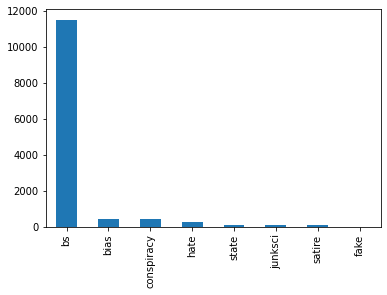

In [26]:
s= fake_news_data['type'].value_counts()
print(s)
s.plot(kind='bar')

In [0]:
import re

def cleaning(raw_news):
  #print(raw_news)
  if str(raw_news) != 'nan':
    
    # 1. Remove non-letters/Special Characters and Punctuations
    news = re.sub("[^a-zA-Z]", " ", raw_news)
    
    # 2. Convert to lower case.
    news =  news.lower()
    
    # 3. Tokenize.
    news_words = nltk.word_tokenize( news)
    
    # 4. Convert the stopwords list to "set" data type.
    stops = set(nltk.corpus.stopwords.words("english"))
    
    # 5. Remove stop words. 
    words = [w for w in  news_words  if not w in stops]
    
    # 6. Lemmentize 
    wordnet_lem = [ WordNetLemmatizer().lemmatize(w) for w in words ]
    
    # 7. Stemming
    stems = [nltk.stem.SnowballStemmer('english').stem(w) for w in wordnet_lem ]
    
    # 8. Join the stemmed words back into one string separated by space, and return the result.
    return " ".join(stems)

In [28]:
fake_news_data["text"].isna().sum()

0

In [29]:
fake_news_data = fake_news_data[ ( fake_news_data['text'].notna())]
fake_news_data.shape

(12953, 21)

In [30]:
import time
t1 = time.time()
fake_news_data['clean_text'] = fake_news_data["text"].apply(cleaning) 
t2 = time.time()
print("\nTime to clean, tokenize and stem text in fake_news_data: \n", len(fake_news_data), "news:", (t2-t1)/60, "min")


Time to clean, tokenize and stem text in fake_news_data: 
 12953 news: 2.1384151577949524 min


In [13]:
print(fake_news_data.shape)
fake_news_data.dtypes

(12953, 21)


uuid                   object
ord_in_thread           int64
author                 object
published              object
title                  object
text                   object
language               object
crawled                object
site_url               object
country                object
domain_rank           float64
thread_title           object
spam_score            float64
main_img_url           object
replies_count           int64
participants_count      int64
likes                   int64
comments                int64
shares                  int64
type                   object
clean_text             object
dtype: object

In [14]:
model = gensim.models.KeyedVectors.load_word2vec_format('/content/drive/Shared drives/CMPE 257: Machine Learning/AlterusVera-Datasets/GoogleNews-vectors-negative300.bin.gz', binary=True)
words = model.index2word

w_rank = {}
for i,word in enumerate(words):
    w_rank[word] = i

WORDS = w_rank

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:253: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [0]:
import re
from collections import Counter

def words(text): return re.findall(r'\w+', text.lower())

def P(word, N=sum(WORDS.values())): 
    "Probability of `word`."
    return - WORDS.get(word, 0)

def correction(word): 
    "Most probable spelling correction for word."
    return max(candidates(word), key=P)

def candidates(word): 
    "Generate possible spelling corrections for word."
    return (known([word]) or known(edits1(word)) or known(edits2(word)) or [word])

def known(words): 
    "The subset of `words` that appear in the dictionary of WORDS."
    return set(w for w in words if w in WORDS)

def edits1(word):
    "All edits that are one edit away from `word`."
    letters    = 'abcdefghijklmnopqrstuvwxyz'
    splits     = [(word[:i], word[i:])    for i in range(len(word) + 1)]
    deletes    = [L + R[1:]               for L, R in splits if R]
    transposes = [L + R[1] + R[0] + R[2:] for L, R in splits if len(R)>1]
    replaces   = [L + c + R[1:]           for L, R in splits if R for c in letters]
    inserts    = [L + c + R               for L, R in splits for c in letters]
    return set(deletes + transposes + replaces + inserts)

def edits2(word): 
    "All edits that are two edits away from `word`."
    return (e2 for e1 in edits1(word) for e2 in edits1(e1))

In [0]:
def spell_checker(text):
    all_words = re.findall(r'\w+', text.lower()) # split sentence to words
    spell_checked_text  = []
    for i in range(len(all_words)):
        spell_checked_text.append(correction(all_words[i]))
    return ' '.join(spell_checked_text)

In [24]:
fake_news_data.head(2)

,uuid,ord_in_thread,author,published,title,text,language,crawled,site_url,country,domain_rank,thread_title,spam_score,main_img_url,replies_count,participants_count,likes,comments,shares,type,clean_text
0,6a175f46bcd24d39b3e962ad0f29936721db70db,0,Barracuda Brigade,2016-10-26T21:41:00.000+03:00,Muslims BUSTED: They Stole Millions In Gov’t B...,Print They should pay all the back all the mon...,english,2016-10-27T01:49:27.168+03:00,100percentfedup.com,US,25689.0,Muslims BUSTED: They Stole Millions In Gov’t B...,0.0,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,1,0,0,0,bias,print pay back money plus interest entir famil...
1,2bdc29d12605ef9cf3f09f9875040a7113be5d5b,0,reasoning with facts,2016-10-29T08:47:11.259+03:00,Re: Why Did Attorney General Loretta Lynch Ple...,Why Did Attorney General Loretta Lynch Plead T...,english,2016-10-29T08:47:11.259+03:00,100percentfedup.com,US,25689.0,Re: Why Did Attorney General Loretta Lynch Ple...,0.0,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,1,0,0,0,bias,attorney general loretta lynch plead fifth bar...


In [21]:
fake_news_data.dtypes

uuid                   object
ord_in_thread           int64
author                 object
published              object
title                  object
text                   object
language               object
crawled                object
site_url               object
country                object
domain_rank           float64
thread_title           object
spam_score            float64
main_img_url           object
replies_count           int64
participants_count      int64
likes                   int64
comments                int64
shares                  int64
type                   object
clean_text             object
dtype: object

In [33]:
print("Before: \n", fake_news_data['clean_text'][0] )
t1 = time.time()
fake_news_data['clean_title'] = fake_news_data['clean_text'].apply(spell_checker)
t2 = time.time()
print("\nTime to spell check the clean_title in fake_news_data: \n", len(fake_news_data), "news:", (t2-t1)/60, "min")



Before: 
 print pay back money plus interest entir famili everyon came need deport asap take two year bust go anoth group steal govern taxpay group somali stole four million govern benefit month report numer case like one muslim refuge immigr commit fraud scam system way control relat


KeyboardInterrupt: ignored

In [0]:
print("\nAfter: \n",fake_news_data['clean_title'][0] )
fake_news_data.head(2)

print("Before: \n", fake_news_data['clean_thread_title'][0] )
t1 = time.time()
fake_news_data['clean_thread_title'] = fake_news_data['clean_thread_title'].apply(spell_checker)
t2 = time.time()
print("\nTime to spell check the clean_thread_title in fake_news_data: \n", len(fake_news_data), "news:", (t2-t1)/60, "min")

print("\nAfter: \n",fake_news_data['clean_thread_title'][0] )
fake_news_data.head(2)

# Testing
# print("Before: \n", fake_news_data['clean_text'][0] )
# t1 = time.time()
# fake_news_data['clean_text'] = fake_news_data['clean_text'].apply(spell_checker)
# t2 = time.time()
# print("\nTime to spell check the clean_text in fake_news_data: \n", len(fake_news_data), "news:", (t2-t1)/60, "min")

# print("\nAfter: \n",fake_news_data['clean_text'][0] )
# fake_news_data.head()

In [0]:
fake_news_data['type'].value_counts()

bs            4064
bias           271
conspiracy     163
hate            99
junksci         97
state            6
fake             2
Name: type, dtype: int64

## LDA

In [34]:
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import numpy as np
np.random.seed(2018)
import nltk
nltk.download('wordnet')
from gensim.models import CoherenceModel
stemmer=PorterStemmer()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [0]:
def lemmatize_stemming(text):
    return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            result.append(lemmatize_stemming(token))
    return result

In [36]:
fake_news_data.shape

(12953, 21)

In [37]:
processed_docs = fake_news_data['clean_text'].map(preprocess)
processed_docs[:10]

KeyboardInterrupt: ignored

In [38]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [0]:
from nltk.corpus import stopwords

def initial_clean(text):
    """
    Function to clean text of websites, email addresess and any punctuation
    We also lower case the text
    """
    text = re.sub("((\S+)?(http(s)?)(\S+))|((\S+)?(www)(\S+))|((\S+)?(\@)(\S+)?)", " ", text)
    text = re.sub("[^a-zA-Z ]", "", text)
    text = text.lower() # lower case the text
    text = nltk.word_tokenize(text)
    return text

stop_words = stopwords.words('english')
def remove_stop_words(text):
    """
    Function that removes all stopwords from text
    """
    return [word for word in text if word not in stop_words]

stemmer = PorterStemmer()
def stem_words(text):
    """
    Function to stem words, so plural and singular are treated the same
    """
    try:
        text = [stemmer.stem(word) for word in text]
        text = [word for word in text if len(word) > 1] # make sure we have no 1 letter words
    except IndexError: # the word "oed" broke this, so needed try except
        pass
    return text

def apply_all(text):
    """
    This function applies all the functions above into one
    """
    return stem_words(remove_stop_words(initial_clean(text)))

In [40]:
t1 = time.time()
fake_news_data['tokenized'] = fake_news_data['text'].apply(apply_all)
t2 = time.time()
print("Time to clean and tokenize", len(fake_news_data), "articles:", (t2-t1)/60, "min")

Time to clean and tokenize 12953 articles: 2.744741614659627 min


In [0]:
from gensim import models, corpora, similarities
from gensim.models import LdaModel

def train_lda(data):
    """
    This function trains the lda model
    We setup parameters like number of topics, the chunksize to use in Hoffman method
    We also do 2 passes of the data since this is a small dataset, so we want the distributions to stabilize
    """
    num_topics = 10
    chunksize = 300
    dictionary = corpora.Dictionary(data['tokenized'])
    corpus = [dictionary.doc2bow(doc) for doc in data['tokenized']]
    t1 = time.time()
    # low alpha means each document is only represented by a small number of topics, and vice versa
    # low eta means each topic is only represented by a small number of words, and vice versa
    lda = LdaModel(corpus=corpus, num_topics=num_topics, id2word=dictionary,
                   alpha=1e-2, eta=0.5e-2, chunksize=chunksize, minimum_probability=0.0, passes=2)
    t2 = time.time()
    print("Time to train LDA model on ", len(fake_news_data), "articles: ", (t2-t1)/60, "min")
    return dictionary,corpus,lda

In [42]:
dictionary,corpus,lda = train_lda(fake_news_data)


/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1023: RuntimeWarning: divide by zero encountered in log
  diff = np.log(self.expElogbeta)


Time to train LDA model on  12953 articles:  0.944463829199473 min


In [43]:
lda.show_topics(num_topics=10, num_words=20)


[(0,
  '0.021*"polic" + 0.013*"protest" + 0.012*"water" + 0.012*"pipelin" + 0.011*"said" + 0.011*"offic" + 0.010*"report" + 0.009*"law" + 0.009*"dakota" + 0.009*"stand" + 0.008*"north" + 0.008*"arrest" + 0.007*"state" + 0.007*"peopl" + 0.007*"rock" + 0.007*"land" + 0.007*"access" + 0.006*"local" + 0.005*"accord" + 0.005*"citi"'),
 (1,
  '0.011*"use" + 0.007*"studi" + 0.007*"health" + 0.006*"human" + 0.006*"research" + 0.006*"peopl" + 0.006*"mani" + 0.006*"system" + 0.006*"one" + 0.005*"also" + 0.005*"food" + 0.005*"need" + 0.005*"may" + 0.005*"world" + 0.005*"new" + 0.004*"work" + 0.004*"energi" + 0.004*"time" + 0.004*"result" + 0.004*"effect"'),
 (2,
  '0.050*"clinton" + 0.028*"email" + 0.022*"hillari" + 0.020*"fbi" + 0.016*"investig" + 0.010*"campaign" + 0.009*"comey" + 0.008*"state" + 0.007*"inform" + 0.007*"wikileak" + 0.007*"depart" + 0.006*"foundat" + 0.006*"podesta" + 0.006*"new" + 0.006*"director" + 0.006*"said" + 0.005*"server" + 0.005*"privat" + 0.005*"offici" + 0.005*"would"

## Label LDA topics

In [0]:
fake_news_data['lda_topics'] = ''

In [0]:
def getKey(item):
  return item[1]



corpus = [dictionary.doc2bow(doc) for doc in fake_news_data['tokenized']]
for i in range(0,len(corpus)):
  list = lda[corpus[i]] # corpus[0] means the first document.
  sorted_list = sorted(list, key=getKey)
  sorted_list.reverse()
  text = " ".join([dictionary[j[0]] for j in sorted_list])
  
  fake_news_data.loc[fake_news_data.index == i, ['lda_topics']] = text


In [46]:
print(' Before : ', fake_news_data.shape)
fake_news_data = fake_news_data[fake_news_data['lda_topics'] != '']
print(' After : ', fake_news_data.shape)


 Before :  (12953, 23)
 After :  (12907, 23)


In [0]:
fake_news_data.to_csv(location_fake_nonfake_processed+'liarliar_lda_merged_for_bs.csv',index= False)

In [48]:
fake_news_data.head()

,uuid,ord_in_thread,author,published,title,text,language,crawled,site_url,country,domain_rank,thread_title,spam_score,main_img_url,replies_count,participants_count,likes,comments,shares,type,clean_text,tokenized,lda_topics
0,6a175f46bcd24d39b3e962ad0f29936721db70db,0,Barracuda Brigade,2016-10-26T21:41:00.000+03:00,Muslims BUSTED: They Stole Millions In Gov’t B...,Print They should pay all the back all the mon...,english,2016-10-27T01:49:27.168+03:00,100percentfedup.com,US,25689.0,Muslims BUSTED: They Stole Millions In Gov’t B...,0.000,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,1,0,0,0,bias,print pay back money plus interest entir famil...,"[print, pay, back, money, plu, interest, entir...",bust control case deport commit came benefit b...
1,2bdc29d12605ef9cf3f09f9875040a7113be5d5b,0,reasoning with facts,2016-10-29T08:47:11.259+03:00,Re: Why Did Attorney General Loretta Lynch Ple...,Why Did Attorney General Loretta Lynch Plead T...,english,2016-10-29T08:47:11.259+03:00,100percentfedup.com,US,25689.0,Re: Why Did Attorney General Loretta Lynch Ple...,0.000,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,1,0,0,0,bias,attorney general loretta lynch plead fifth bar...,"[attorney, gener, loretta, lynch, plead, fifth...",control back deport case commit came bust bene...
2,c70e149fdd53de5e61c29281100b9de0ed268bc3,0,Barracuda Brigade,2016-10-31T01:41:49.479+02:00,BREAKING: Weiner Cooperating With FBI On Hilla...,Red State : \nFox News Sunday reported this mo...,english,2016-10-31T01:41:49.479+02:00,100percentfedup.com,US,25689.0,BREAKING: Weiner Cooperating With FBI On Hilla...,0.000,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,1,0,0,0,bias,red state fox news sunday report morn anthoni ...,"[red, state, fox, news, sunday, report, morn, ...",back case came control asap deport commit bust...
3,7cf7c15731ac2a116dd7f629bd57ea468ed70284,0,Fed Up,2016-11-01T05:22:00.000+02:00,PIN DROP SPEECH BY FATHER OF DAUGHTER Kidnappe...,Email Kayla Mueller was a prisoner and torture...,english,2016-11-01T15:46:26.304+02:00,100percentfedup.com,US,25689.0,PIN DROP SPEECH BY FATHER OF DAUGHTER Kidnappe...,0.068,http://100percentfedup.com/wp-content/uploads/...,0,0,0,0,0,bias,email kayla mueller prison tortur isi chanc re...,"[email, kayla, mueller, prison, tortur, isi, c...",control came benefit deport commit case bust b...
4,0206b54719c7e241ffe0ad4315b808290dbe6c0f,0,Fed Up,2016-11-01T21:56:00.000+02:00,FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...,Email HEALTHCARE REFORM TO MAKE AMERICA GREAT ...,english,2016-11-01T23:59:42.266+02:00,100percentfedup.com,US,25689.0,FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...,0.865,http://100percentfedup.com/wp-content/uploads/...,0,0,0,0,0,bias,email healthcar reform make america great sinc...,"[email, healthcar, reform, make, america, grea...",asap bust came deport back control commit case...


## Split data for training 

In [81]:
fake_news_data =  pd.read_csv(location_fake_nonfake_processed+'liarliar_lda_merged_for_bs.csv', low_memory =False)
fake_news_data.head(2)

,uuid,ord_in_thread,author,published,title,text,language,crawled,site_url,country,domain_rank,thread_title,spam_score,main_img_url,replies_count,participants_count,likes,comments,shares,type,clean_text,tokenized,lda_topics
0,6a175f46bcd24d39b3e962ad0f29936721db70db,0,Barracuda Brigade,2016-10-26T21:41:00.000+03:00,Muslims BUSTED: They Stole Millions In Gov’t B...,Print They should pay all the back all the mon...,english,2016-10-27T01:49:27.168+03:00,100percentfedup.com,US,25689.0,Muslims BUSTED: They Stole Millions In Gov’t B...,0.0,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,1,0,0,0,bias,print pay back money plus interest entir famil...,"['print', 'pay', 'back', 'money', 'plu', 'inte...",bust control case deport commit came benefit b...
1,2bdc29d12605ef9cf3f09f9875040a7113be5d5b,0,reasoning with facts,2016-10-29T08:47:11.259+03:00,Re: Why Did Attorney General Loretta Lynch Ple...,Why Did Attorney General Loretta Lynch Plead T...,english,2016-10-29T08:47:11.259+03:00,100percentfedup.com,US,25689.0,Re: Why Did Attorney General Loretta Lynch Ple...,0.0,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,1,0,0,0,bias,attorney general loretta lynch plead fifth bar...,"['attorney', 'gener', 'loretta', 'lynch', 'ple...",control back deport case commit came bust bene...


In [82]:
print(fake_news_data.shape)
print(fake_news_data.type.nunique())
num_of_type = fake_news_data.type.nunique();
#Other labels
fakes_news_other_labels = fake_news_data[fake_news_data['type'] != 'bs']
print(fakes_news_other_labels.shape)

fakes_news_bs_labels = fake_news_data[fake_news_data['type'] == 'bs']
print(fakes_news_bs_labels.shape)
rows,cols = fakes_news_bs_labels.shape
rows_split = round(rows/2);
print('rows_split : ',rows_split)

fake_news_data.type.unique()

(12907, 23)
8
(1461, 23)
(11446, 23)
rows_split :  5723


array(['bias', 'conspiracy', 'fake', 'bs', 'satire', 'hate', 'junksci',
       'state'], dtype=object)

In [0]:
test = fakes_news_bs_labels[rows_split:]

In [84]:
train = pd.concat([fakes_news_other_labels, fakes_news_bs_labels[:rows_split]],ignore_index=True)
print('shape : ',train.shape)
train.head(3)

shape :  (7184, 23)


,uuid,ord_in_thread,author,published,title,text,language,crawled,site_url,country,domain_rank,thread_title,spam_score,main_img_url,replies_count,participants_count,likes,comments,shares,type,clean_text,tokenized,lda_topics
0,6a175f46bcd24d39b3e962ad0f29936721db70db,0,Barracuda Brigade,2016-10-26T21:41:00.000+03:00,Muslims BUSTED: They Stole Millions In Gov’t B...,Print They should pay all the back all the mon...,english,2016-10-27T01:49:27.168+03:00,100percentfedup.com,US,25689.0,Muslims BUSTED: They Stole Millions In Gov’t B...,0.0,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,1,0,0,0,bias,print pay back money plus interest entir famil...,"['print', 'pay', 'back', 'money', 'plu', 'inte...",bust control case deport commit came benefit b...
1,2bdc29d12605ef9cf3f09f9875040a7113be5d5b,0,reasoning with facts,2016-10-29T08:47:11.259+03:00,Re: Why Did Attorney General Loretta Lynch Ple...,Why Did Attorney General Loretta Lynch Plead T...,english,2016-10-29T08:47:11.259+03:00,100percentfedup.com,US,25689.0,Re: Why Did Attorney General Loretta Lynch Ple...,0.0,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,1,0,0,0,bias,attorney general loretta lynch plead fifth bar...,"['attorney', 'gener', 'loretta', 'lynch', 'ple...",control back deport case commit came bust bene...
2,c70e149fdd53de5e61c29281100b9de0ed268bc3,0,Barracuda Brigade,2016-10-31T01:41:49.479+02:00,BREAKING: Weiner Cooperating With FBI On Hilla...,Red State : \nFox News Sunday reported this mo...,english,2016-10-31T01:41:49.479+02:00,100percentfedup.com,US,25689.0,BREAKING: Weiner Cooperating With FBI On Hilla...,0.0,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,1,0,0,0,bias,red state fox news sunday report morn anthoni ...,"['red', 'state', 'fox', 'news', 'sunday', 'rep...",back case came control asap deport commit bust...


In [85]:
train.shape

(7184, 23)

# KNN Similarity

In [86]:
X_train = train[train['lda_topics'] != '']
print(X_train.shape)

X_train = X_train[['lda_topics']]
print(X_train.shape)
Y_train = train[['type']]

(7184, 23)
(7184, 1)


In [87]:
test = test[test['lda_topics'] != '']
print(test.shape)


(5723, 23)


In [88]:
X_train

,lda_topics
0,bust control case deport commit came benefit b...
1,control back deport case commit came bust bene...
2,back case came control asap deport commit bust...
3,control came benefit deport commit case bust b...
4,asap bust came deport back control commit case...
...,...
7179,asap case back came control deport commit bene...
7180,control came bust deport commit case benefit b...
7181,came case control benefit bust deport commit b...
7182,deport control case came commit bust benefit b...


In [89]:
test = test[['lda_topics']]
test.shape

(5723, 1)

In [90]:
test_corpus = test[test['lda_topics'] != '']
test_corpus.shape

(5723, 1)

In [91]:
test_corpus.shape

(5723, 1)

In [92]:
import nltk
from nltk.corpus import wordnet as wn
from nltk.corpus import genesis
nltk.download('genesis')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
genesis_ic = wn.ic(genesis, False, 0.0)

import numpy as np
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer 
from nltk.stem import SnowballStemmer
from nltk.stem.lancaster import LancasterStemmer
from nltk.corpus import stopwords
from sklearn.metrics import roc_auc_score

[nltk_data] Downloading package genesis to /root/nltk_data...
[nltk_data]   Package genesis is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [0]:
from nltk import word_tokenize, sent_tokenize 
from nltk.corpus import wordnet as wn

class KNN_NLC_Classifer():
    def __init__(self, k=1, distance_type = 'path'):
        self.k = k
        self.distance_type = distance_type

    # This function is used for training
    def fit(self, x_train, y_train):
        self.x_train = x_train
        self.y_train = y_train

    # This function runs the K(1) nearest neighbour algorithm and
    # returns the label with closest match. 
    def predict(self, x_test):
        #print('predict ')

        self.x_test = x_test
        #print(x_test)
        y_predict = []
        #print(self.x_train.shape[0])
        for i in range(len(x_test)):
            #print(len(x_test))
            if i % 500 == 0: print('processing ',i,' of ',len(x_test))
            max_sim = 0
            max_index = 0
            MAX = 1.0
            #print('x1 : ',x_test[i]);
            for j in range(self.x_train.shape[0]):
                #print(i,j)
                #print('x1 x2 ',x_test[i], self.x_train['lda_topics'][j])
                temp = self.document_similarity(x_test[i], self.x_train['lda_topics'][j])
                #print('temp: ',temp)
                if temp > max_sim:
                    max_sim = temp
                    max_index = j
                if max_sim == MAX:
                    break;    
            #print('max_inde: ',max_index)
            #print(self.y_train.loc[max_index])       
            #print(self.y_train.loc[max_index]['type'])    
            y_predict.append(self.y_train.loc[max_index]['type'])
        return y_predict


    def convert_tag(self, tag):
        """Convert the tag given by nltk.pos_tag to the tag used by wordnet.synsets"""
        tag_dict = {'N': 'n', 'J': 'a', 'R': 'r', 'V': 'v'}
        try:
            return tag_dict[tag[0]]
        except KeyError:
            return None


    def doc_to_synsets(self, doc):
        """
            Returns a list of synsets in document.
            Tokenizes and tags the words in the document doc.
            Then finds the first synset for each word/tag combination.
        If a synset is not found for that combination it is skipped.

        Args:
            doc: string to be converted

        Returns:
            list of synsets
        """
        tokens = word_tokenize(doc+' ')
        
        l = []
        tags = nltk.pos_tag([tokens[0] + ' ']) if len(tokens) == 1 else nltk.pos_tag(tokens)
        
        for token, tag in zip(tokens, tags):
            syntag = self.convert_tag(tag[1])
            syns = wn.synsets(token, syntag)
            if (len(syns) > 0):
                l.append(syns[0])
        return l  

    def document_similarity(self,doc1, doc2):
          """Finds the symmetrical similarity between doc1 and doc2"""

          synsets1 = self.doc_to_synsets(doc1)
          synsets2 = self.doc_to_synsets(doc2)
         
          
          return (self.similarity_score(synsets1, synsets2,'wup') + self.similarity_score(synsets2, synsets1,'wup')) / 2

    def similarity_score(self, s1, s2, distance_type = 'path'):
          """
          Calculate the normalized similarity score of s1 onto s2
          For each synset in s1, finds the synset in s2 with the largest similarity value.
          Sum of all of the largest similarity values and normalize this value by dividing it by the
          number of largest similarity values found.

          Args:
              s1, s2: list of synsets from doc_to_synsets

          Returns:
              normalized similarity score of s1 onto s2
          """
          s1_largest_scores = []

          for i, s1_synset in enumerate(s1, 0):
              max_score = 0
              for s2_synset in s2:
                  if distance_type == 'path':
                      score = s1_synset.path_similarity(s2_synset, simulate_root = False)
                  else:
                      score = s1_synset.wup_similarity(s2_synset)
                      if score != None:
                         
                        if score > max_score:
                            max_score = score
              
              if max_score != 0:
                  s1_largest_scores.append(max_score)
          
          mean_score = np.mean(s1_largest_scores)
          

          return mean_score  
    

In [63]:
doc1 = 'I like rains'
doc2 = 'I like showers'
x = KNN_NLC_Classifer()
print("Test Similarity Score: ", x.document_similarity(doc1, doc2))

Test Similarity Score:  0.7559523809523809


In [0]:
classifier = KNN_NLC_Classifer(k=1, distance_type='wcp')
classifier.fit(X_train, Y_train)


In [0]:
test_lines = test[test['lda_topics'] != '']


In [107]:
print(test[test['lda_topics'] != ''].shape)

(5723, 1)


In [108]:
test_lines = test_lines['lda_topics'].tolist()
len(test_lines)

5723

In [0]:
import re
stop_words = stopwords.words('english')

test_corpus = []
ps = PorterStemmer()
for i in range(len(test_lines)):
    #print(test_lines[i])
    review = re.sub('[^a-zA-Z]', ' ', test_lines[i])
    review = review.lower()
    review = review.split()

    review = [word for word in review if not word in stop_words]
    review = ' '.join(review)
    test_corpus.append(review)

In [100]:
print(len(test_lines))
print(test.shape)
len(test_corpus)

5723
(5723, 1)


5723

In [101]:
test_corpus[0]

'came control case anoth deport commit bust benefit back asap'

In [102]:
y_pred_final = classifier.predict(test_corpus)


processing  0  of  5723


KeyboardInterrupt: ignored

In [0]:
test = fakes_news_bs_labels[rows_split:]

In [73]:
print(len(y_pred_final))
test.shape

5723


(5723, 23)

In [74]:
test.dtypes

uuid                   object
ord_in_thread           int64
author                 object
published              object
title                  object
text                   object
language               object
crawled                object
site_url               object
country                object
domain_rank           float64
thread_title           object
spam_score            float64
main_img_url           object
replies_count           int64
participants_count      int64
likes                   int64
comments                int64
shares                  int64
type                   object
clean_text             object
tokenized              object
lda_topics             object
dtype: object

In [0]:
Test = test[test['lda_topics'] != '']

In [0]:
Test['type'] = y_pred_final

In [77]:
print(train.shape)
print(Test.shape)

(7184, 23)
(5723, 23)


In [0]:
df = pd.concat([train,Test])


In [79]:
df.shape

(12907, 23)

bs            5758
bias          5689
conspiracy     660
hate           255
satire         183
junksci        178
state          121
fake            63
Name: type, dtype: int64


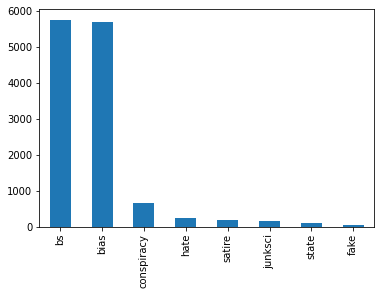

In [80]:
s= df['type'].value_counts()
print(s)
s.plot(kind='bar')

In [0]:
df.to_csv('bs_labelledData.csv', index=False)

In [0]:
# Load Dataset from drive
fake_news_data = pd.read_csv('bs_labelledData.csv', low_memory =False)
fake_news_data.head(2)

,uuid,ord_in_thread,author,published,title,text,language,crawled,site_url,country,domain_rank,thread_title,spam_score,main_img_url,replies_count,participants_count,likes,comments,shares,type,clean_text,tokenized,lda_topics
0,6a175f46bcd24d39b3e962ad0f29936721db70db,0,Barracuda Brigade,2016-10-26T21:41:00.000+03:00,Muslims BUSTED: They Stole Millions In Gov’t B...,Print They should pay all the back all the mon...,english,2016-10-27T01:49:27.168+03:00,100percentfedup.com,US,25689.0,Muslims BUSTED: They Stole Millions In Gov’t B...,0.0,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,1,0,0,0,bias,print pay back money plus interest entir famil...,"['print', 'pay', 'back', 'money', 'plu', 'inte...",bust control case deport commit came benefit b...
1,2bdc29d12605ef9cf3f09f9875040a7113be5d5b,0,reasoning with facts,2016-10-29T08:47:11.259+03:00,Re: Why Did Attorney General Loretta Lynch Ple...,Why Did Attorney General Loretta Lynch Plead T...,english,2016-10-29T08:47:11.259+03:00,100percentfedup.com,US,25689.0,Re: Why Did Attorney General Loretta Lynch Ple...,0.0,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,1,0,0,0,bias,attorney general loretta lynch plead fifth bar...,"['attorney', 'gener', 'loretta', 'lynch', 'ple...",control back deport case commit came bust bene...


In [0]:
fake_news_data.type.unique()

array(['bias', 'conspiracy', 'fake', 'satire', 'hate', 'junksci', 'state',
       'bs', 'type    bias\nName: 4, dtype: object',
       'type    bias\nName: 1, dtype: object',
       'type    bias\nName: 13, dtype: object',
       'type    bias\nName: 0, dtype: object',
       'type    fake\nName: 185, dtype: object',
       'type    satire\nName: 336, dtype: object',
       'type    bias\nName: 14, dtype: object',
       'type    bias\nName: 3, dtype: object',
       'type    bs\nName: 1510, dtype: object',
       'type    satire\nName: 383, dtype: object',
       'type    bias\nName: 863, dtype: object',
       'type    fake\nName: 57, dtype: object',
       'type    conspiracy\nName: 36, dtype: object',
       'type    conspiracy\nName: 90, dtype: object',
       'type    satire\nName: 304, dtype: object',
       'type    bias\nName: 450, dtype: object',
       'type    junksci\nName: 733, dtype: object',
       'type    conspiracy\nName: 42, dtype: object',
       'type    satire\nN

In [0]:
dictionary = gensim.corpora.Dictionary(processed_docs)
count = 0
for k, v in dictionary.iteritems():
    print(k, v)
    count += 1
    if count > 10:
        break

In [0]:
dictionary.filter_extremes(no_below=15, no_above=0.5, keep_n=100000)

In [0]:
bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]
bow_corpus[4310]

[(36, 1), (66, 1)]

In [0]:
bow_doc_4310 = bow_corpus[4310]
for i in range(len(bow_doc_4310)):
    print("Word {} (\"{}\") appears {} time.".format(bow_doc_4310[i][0], 
                                               dictionary[bow_doc_4310[i][0]], 
bow_doc_4310[i][1]))

Word 36 ("tell") appears 1 time.
Word 66 ("america") appears 1 time.


In [0]:
from gensim import corpora, models
tfidf = models.TfidfModel(bow_corpus)
corpus_tfidf = tfidf[bow_corpus]
from pprint import pprint
for doc in corpus_tfidf:
    pprint(doc)
    break

[(0, 0.5953727044797885),
 (1, 0.46794196630692375),
 (2, 0.3915172951786276),
 (3, 0.5227579425558675)]


In [0]:
def compute_coherence_values(corpus, dictionary, k, a, b):
    
    lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics=k, id2word=dictionary, passes=10, alpha=a, eta=b)
    
    coherence_model_lda = CoherenceModel(model=lda_model, dictionary=dictionary, coherence='c_v', texts=fake_news_data['clean_title'])
    
    return coherence_model_lda.get_coherence()

In [0]:
'''
import numpy as np
import tqdm
grid = {}
grid['Validation_Set'] = {}
# Topics range
min_topics = 2
max_topics = 11
step_size = 1
topics_range = range(min_topics, max_topics, step_size)
# Alpha parameter
alpha = list(np.arange(0.01, 1, 0.3))
alpha.append('symmetric')
alpha.append('asymmetric')
# Beta parameter
beta = list(np.arange(0.01, 1, 0.3))
beta.append('symmetric')
# Validation sets
num_of_docs = len(bow_corpus)
corpus_sets = [# gensim.utils.ClippedCorpus(corpus, num_of_docs*0.25), 
               # gensim.utils.ClippedCorpus(corpus, num_of_docs*0.5), 
               gensim.utils.ClippedCorpus(bow_corpus, num_of_docs*0.75), 
               bow_corpus]
corpus_title = ['75% Corpus', '100% Corpus']
model_results = {'Validation_Set': [],
                 'Topics': [],
                 'Alpha': [],
                 'Beta': [],
                 'Coherence': []
                }
# Can take a long time to run
if 1 == 1:
    pbar = tqdm.tqdm(total = (len(corpus_sets)*len(topics_range)*len(alpha)*len(beta)))
    
    # iterate through validation corpuses
    for i in range(len(corpus_sets)):
        # iterate through number of topics
        for k in topics_range:
            for a in alpha:
              # iterare through beta values
                for b in beta:
                    # get the coherence score for the given parameters
                    # get the coherence score for the given parameters
                    cv = compute_coherence_values(corpus=corpus_sets[i], dictionary=dictionary, 
                                                k=k, a=a, b=b)
                    # Save the model results
                    model_results['Validation_Set'].append(corpus_title[i])
                    model_results['Topics'].append(k)
                    model_results['Alpha'].append(a)
                    model_results['Beta'].append(b)
                    model_results['Coherence'].append(cv)
                    
                    pbar.update(1)
    pd.DataFrame(model_results).to_csv('lda_tuning_results.csv', index=False)
    pbar.close()
'''

"\nimport numpy as np\nimport tqdm\ngrid = {}\ngrid['Validation_Set'] = {}\n# Topics range\nmin_topics = 2\nmax_topics = 11\nstep_size = 1\ntopics_range = range(min_topics, max_topics, step_size)\n# Alpha parameter\nalpha = list(np.arange(0.01, 1, 0.3))\nalpha.append('symmetric')\nalpha.append('asymmetric')\n# Beta parameter\nbeta = list(np.arange(0.01, 1, 0.3))\nbeta.append('symmetric')\n# Validation sets\nnum_of_docs = len(bow_corpus)\ncorpus_sets = [# gensim.utils.ClippedCorpus(corpus, num_of_docs*0.25), \n               # gensim.utils.ClippedCorpus(corpus, num_of_docs*0.5), \n               gensim.utils.ClippedCorpus(bow_corpus, num_of_docs*0.75), \n               bow_corpus]\ncorpus_title = ['75% Corpus', '100% Corpus']\nmodel_results = {'Validation_Set': [],\n                 'Topics': [],\n                 'Alpha': [],\n                 'Beta': [],\n                 'Coherence': []\n                }\n# Can take a long time to run\nif 1 == 1:\n    pbar = tqdm.tqdm(total = (len(c

In [0]:
lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics=10, id2word=dictionary, passes=2, workers=2)

In [0]:
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.037*"peopl" + 0.035*"water" + 0.032*"kill" + 0.023*"wikileak" + 0.022*"face" + 0.021*"scientist" + 0.020*"child" + 0.019*"trump" + 0.017*"syrian" + 0.017*"cancer"
Topic: 1 
Words: 0.059*"obama" + 0.042*"hillari" + 0.041*"trump" + 0.027*"clinton" + 0.026*"peopl" + 0.024*"explain" + 0.024*"year" + 0.021*"evil" + 0.020*"happen" + 0.019*"reveal"
Topic: 2 
Words: 0.053*"world" + 0.040*"trump" + 0.040*"hillari" + 0.031*"clinton" + 0.031*"video" + 0.029*"email" + 0.024*"right" + 0.023*"putin" + 0.021*"human" + 0.015*"news"
Topic: 3 
Words: 0.069*"clinton" + 0.047*"stand" + 0.042*"rock" + 0.036*"thier" + 0.036*"messin" + 0.036*"hillari" + 0.029*"protest" + 0.019*"polic" + 0.019*"begin" + 0.019*"state"
Topic: 4 
Words: 0.042*"clinton" + 0.033*"trump" + 0.030*"syria" + 0.026*"vote" + 0.023*"hillari" + 0.022*"wikileak" + 0.021*"hou" + 0.018*"elect" + 0.018*"speak" + 0.017*"machin"
Topic: 5 
Words: 0.106*"trump" + 0.038*"govern" + 0.035*"russia" + 0.032*"america" + 0.031*"hillar

In [0]:
lda_model_tfidf = gensim.models.LdaMulticore(corpus_tfidf, num_topics=10, id2word=dictionary, passes=2, workers=4)
for idx, topic in lda_model_tfidf.print_topics(-1):
    print('Topic: {} Word: {}'.format(idx, topic))

Topic: 0 Word: 0.045*"hillari" + 0.020*"clinton" + 0.020*"work" + 0.018*"chart" + 0.017*"eastern" + 0.017*"outlook" + 0.015*"wikileak" + 0.014*"help" + 0.014*"stand" + 0.013*"german"
Topic: 1 Word: 0.034*"elect" + 0.024*"water" + 0.023*"democrat" + 0.018*"polic" + 0.018*"state" + 0.017*"break" + 0.017*"video" + 0.015*"kill" + 0.014*"trump" + 0.013*"happen"
Topic: 2 Word: 0.047*"trump" + 0.030*"medium" + 0.027*"right" + 0.023*"putin" + 0.019*"power" + 0.015*"clinton" + 0.014*"elect" + 0.013*"hillari" + 0.013*"human" + 0.013*"contain"
Topic: 3 Word: 0.040*"trump" + 0.035*"video" + 0.031*"clinton" + 0.021*"hillari" + 0.020*"obama" + 0.020*"report" + 0.017*"investig" + 0.016*"come" + 0.015*"leav" + 0.014*"polit"
Topic: 4 Word: 0.035*"america" + 0.024*"trump" + 0.020*"comment" + 0.017*"lose" + 0.015*"clinton" + 0.014*"surviv" + 0.014*"hillari" + 0.013*"iller" + 0.012*"fake" + 0.011*"time"
Topic: 5 Word: 0.038*"world" + 0.035*"russia" + 0.028*"time" + 0.020*"hillari" + 0.017*"woman" + 0.016*

In [0]:
for index, score in sorted(lda_model[bow_corpus[4310]], key=lambda tup: -1*tup[1]):
    print("\nScore: {}\t \nTopic: {}".format(score, lda_model.print_topic(index, 10)))



Score: 0.699950635433197	 
Topic: 0.106*"trump" + 0.038*"govern" + 0.035*"russia" + 0.032*"america" + 0.031*"hillari" + 0.023*"real" + 0.023*"medium" + 0.021*"vote" + 0.021*"elect" + 0.020*"famili"

Score: 0.03335343301296234	 
Topic: 0.057*"elect" + 0.033*"black" + 0.025*"hillari" + 0.025*"clinton" + 0.023*"human" + 0.023*"life" + 0.021*"trump" + 0.019*"video" + 0.015*"iran" + 0.014*"american"

Score: 0.03334243595600128	 
Topic: 0.037*"peopl" + 0.035*"water" + 0.032*"kill" + 0.023*"wikileak" + 0.022*"face" + 0.021*"scientist" + 0.020*"child" + 0.019*"trump" + 0.017*"syrian" + 0.017*"cancer"

Score: 0.03334137424826622	 
Topic: 0.079*"trump" + 0.039*"presid" + 0.031*"dinucci" + 0.031*"mansion" + 0.026*"elect" + 0.022*"million" + 0.021*"donald" + 0.019*"time" + 0.018*"work" + 0.017*"truth"

Score: 0.033341046422719955	 
Topic: 0.053*"world" + 0.040*"trump" + 0.040*"hillari" + 0.031*"clinton" + 0.031*"video" + 0.029*"email" + 0.024*"right" + 0.023*"putin" + 0.021*"human" + 0.015*"news"

In [0]:
for index, score in sorted(lda_model_tfidf[bow_corpus[4310]], key=lambda tup: -1*tup[1]):
    print("\nScore: {}\t \nTopic: {}".format(score, lda_model_tfidf.print_topic(index, 10)))


Score: 0.6999488472938538	 
Topic: 0.035*"america" + 0.024*"trump" + 0.020*"comment" + 0.017*"lose" + 0.015*"clinton" + 0.014*"surviv" + 0.014*"hillari" + 0.013*"iller" + 0.012*"fake" + 0.011*"time"

Score: 0.033352065831422806	 
Topic: 0.025*"para" + 0.021*"halloween" + 0.019*"elect" + 0.017*"black" + 0.017*"health" + 0.015*"life" + 0.015*"home" + 0.015*"trump" + 0.014*"hillari" + 0.013*"clinton"

Score: 0.03334273025393486	 
Topic: 0.047*"trump" + 0.030*"medium" + 0.027*"right" + 0.023*"putin" + 0.019*"power" + 0.015*"clinton" + 0.014*"elect" + 0.013*"hillari" + 0.013*"human" + 0.013*"contain"

Score: 0.03334052115678787	 
Topic: 0.031*"trump" + 0.028*"donald" + 0.026*"american" + 0.019*"truth" + 0.017*"know" + 0.016*"white" + 0.015*"reveal" + 0.015*"announc" + 0.014*"poll" + 0.013*"review"

Score: 0.03333751857280731	 
Topic: 0.033*"vote" + 0.029*"hillari" + 0.026*"trump" + 0.024*"elect" + 0.020*"govern" + 0.018*"clinton" + 0.018*"support" + 0.017*"thing" + 0.015*"danger" + 0.013*"

# Data Insights

Topic: 0 Word: 0.045*"hillari" + 0.020*"clinton" + 0.020*"work" + 0.018*"chart" + 0.017*"eastern" + 0.017*"outlook" + 0.015*"wikileak" + 0.014*"help" + 0.014*"stand" + 0.013*"german"

Topic: 1 Word: 0.034*"elect" + 0.024*"water" + 0.023*"democrat" + 0.018*"polic" + 0.018*"state" + 0.017*"break" + 0.017*"video" + 0.015*"kill" + 0.014*"trump" + 0.013*"happen"

Topic: 2 Word: 0.047*"trump" + 0.030*"medium" + 0.027*"right" + 0.023*"putin" + 0.019*"power" + 0.015*"clinton" + 0.014*"elect" + 0.013*"hillari" + 0.013*"human" + 0.013*"contain"

Topic: 3 Word: 0.040*"trump" + 0.035*"video" + 0.031*"clinton" + 0.021*"hillari" + 0.020*"obama" + 0.020*"report" + 0.017*"investig" + 0.016*"come" + 0.015*"leav" + 0.014*"polit"

Topic: 4 Word: 0.035*"america" + 0.024*"trump" + 0.020*"comment" + 0.017*"lose" + 0.015*"clinton" + 0.014*"surviv" + 0.014*"hillari" + 0.013*"iller" + 0.012*"fake" + 0.011*"time"

Topic: 5 Word: 0.038*"world" + 0.035*"russia" + 0.028*"time" + 0.020*"hillari" + 0.017*"woman" + 0.016*"trump" + 0.013*"attack" + 0.013*"stop" + 0.012*"look" + 0.012*"refug"

Topic: 6 Word: 0.035*"clinton" + 0.033*"hillari" + 0.021*"link" + 0.020*"presid" + 0.020*"trump" + 0.015*"email" + 0.015*"mogul" + 0.014*"cancer" + 0.014*"peopl" + 0.013*"speak"

Topic: 7 Word: 0.025*"para" + 0.021*"halloween" + 0.019*"elect" + 0.017*"black" + 0.017*"health" + 0.015*"life" + 0.015*"home" + 0.015*"trump" + 0.014*"hillari" + 0.013*"clinton"

Topic: 8 Word: 0.033*"vote" + 0.029*"hillari" + 0.026*"trump" + 0.024*"elect" + 0.020*"govern" + 0.018*"clinton" + 0.018*"support" + 0.017*"thing" + 0.015*"danger" + 0.013*"need"

Topic: 9 Word: 0.031*"trump" + 0.028*"donald" + 0.026*"american" + 0.019*"truth" + 0.017*"know" + 0.016*"white" + 0.015*"reveal" + 0.015*"announc" + 0.014*"poll" + 0.013*"review"

Once again, we ran this on 10 topics, and we noticed that the articles were political again.
From the topics we can see they talk about Hillary Clinton and the investigation into the leaks, as well as Donald Trump and the campaign.  

These once again show the bias, that could mislead the voters.
We can use LDA to determine that spelling seems to be a weak point for fake articles, as well as they happen to have a large bias.
This data can be used to implement a spell checker as well as a clickbait checker. This will give us some promising results.


# References
* https://towardsdatascience.com/unsupervised-nlp-topic-models-as-a-supervised-learning-input-cf8ee9e5cf28
* https://towardsdatascience.com/topic-modeling-and-latent-dirichlet-allocation-in-python-9bf156893c24
* https://towardsdatascience.com/evaluate-topic-model-in-python-latent-dirichlet-allocation-lda-7d57484bb5d0